In [1]:
from sklearn.datasets import make_multilabel_classification as mmc
from sklearn.datasets import make_classification as mc
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Generating 4 class Single Label Classification Dataset

In [2]:
x,y=mc(n_samples=1000, n_features=10,n_classes=4,n_redundant=0,n_clusters_per_class=1,random_state=0)

In [3]:
lda1=LDA(n_components=2)
x_lda=lda1.fit_transform(x,y)

In [4]:
lr=LR()
x_train,x_test,y_train,y_test=train_test_split(x_lda,y,random_state=0)
l=lr.fit(x_train,y_train)
coef=l.coef_
intercept=l.intercept_

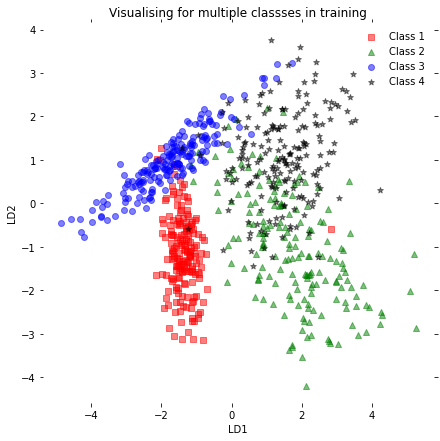

In [5]:
label_dict = {0:'Class 1', 1: 'Class 2', 2: 'Class 3', 3:'Class 4'}
plt.figure(figsize=(7,7))

def plot_scikit_lda(X,y, title):
      ax = plt.subplot(111)
      for label,marker,color in zip(
          [i for i in range(4)],('s','^','o','*'),('red','green','blue','black')):

          plt.scatter(x=X[:,0][y == label],
                      y=X[:,1][y == label],
                      marker=marker,
                      color=color,
                      alpha=0.5,
                      label=label_dict[label])

      plt.xlabel('LD1')
      plt.ylabel('LD2')

      leg = plt.legend(loc='upper right', fancybox=True)
      leg.get_frame().set_alpha(0)
      plt.title(title)

      # hide axis ticks
      plt.tick_params(axis="both", which="both", bottom="off", top="off",  
              labelbottom="on", left="off", right="off", labelleft="on")

      # remove axis spines
      ax.spines["top"].set_visible(False)  
      ax.spines["right"].set_visible(False)
      ax.spines["bottom"].set_visible(False)
      ax.spines["left"].set_visible(False)    
      plt.tight_layout
      plt.show()

plot_scikit_lda(x_train, y_train, title='Visualising for multiple classses in training')

##**Logistic Regression for multi class labels**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


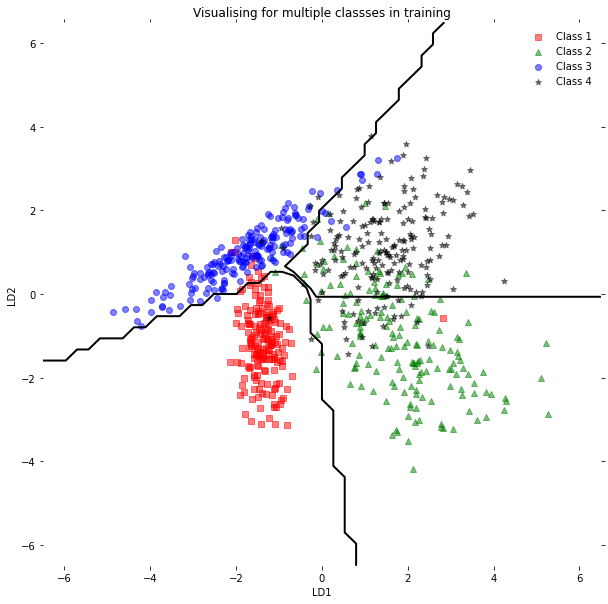

In [6]:
plt.figure(figsize=(10,10))

x1_bound, x2_bound = np.meshgrid(np.linspace(-6.5, 6.5), np.linspace(-6.5, 6.5))
z=np.ndarray((x1_bound.shape[0],x1_bound.shape[1],coef.shape[0]))
z1=np.zeros(x1_bound.shape)
for i in range(coef.shape[0]):
  z[:,:,i]=intercept[i]+coef[i,0]*x1_bound+coef[i,1]*x2_bound
for i in range(z1.shape[0]):
    for j in range(z1.shape[1]):
        maximum = max(z[i][j][0], z[i][j][1], z[i][j][2], z[i][j][3])
        if maximum == z[i][j][0]:
            z1[i][j] = 0
        elif maximum == z[i][j][1]:
            z1[i][j] = 1
        elif maximum == z[i][j][2]:
            z1[i][j] = 1
        else:
            z1[i][j] = 3

plt.contour(x1_bound, x2_bound, z1, levels=[0.5,1.5], colors='black', linewidths=2)
plot_scikit_lda(x_train, y_train, title='Visualising for multiple classses in training')

In [7]:
y_pred=lr.predict(x_test)
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        69
           1       0.89      0.75      0.81        67
           2       0.89      0.85      0.87        60
           3       0.75      0.91      0.82        54

    accuracy                           0.87       250
   macro avg       0.87      0.87      0.86       250
weighted avg       0.87      0.87      0.87       250



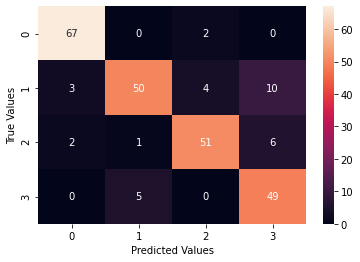

In [8]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

## Generating 4-class Multilabel Classification Dataset

In [9]:
X,Y=mmc(n_samples=1000,n_features=6,n_classes=4,n_labels=2,length=30,random_state=0,allow_unlabeled=False)

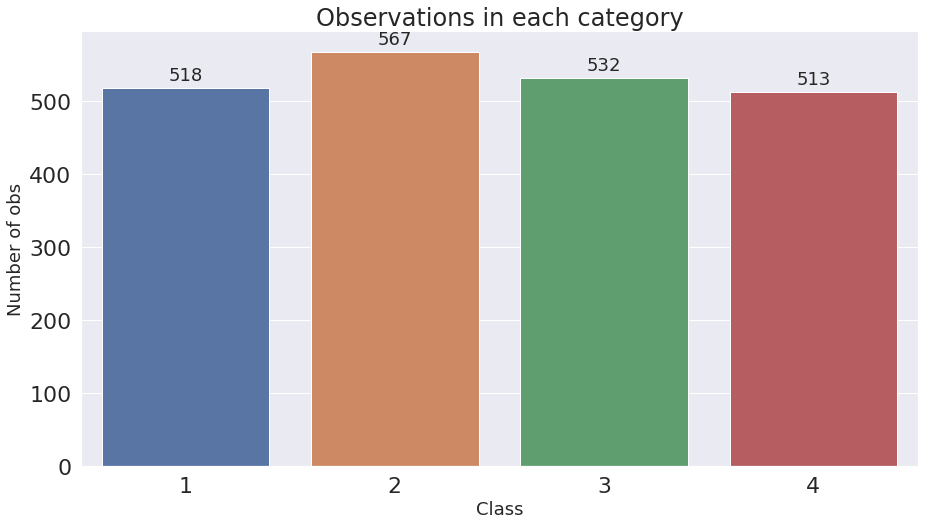

In [10]:
categories = [i for i in range(1,5)]
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax= sns.barplot(categories, np.sum(Y[:,:],axis=0))
plt.title("Observations in each category", fontsize=24)
plt.ylabel('Number of obs', fontsize=18)
plt.xlabel('Class', fontsize=18)
#adding the text labels
rects = ax.patches
labels = np.sum(Y[:,:],axis=0)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

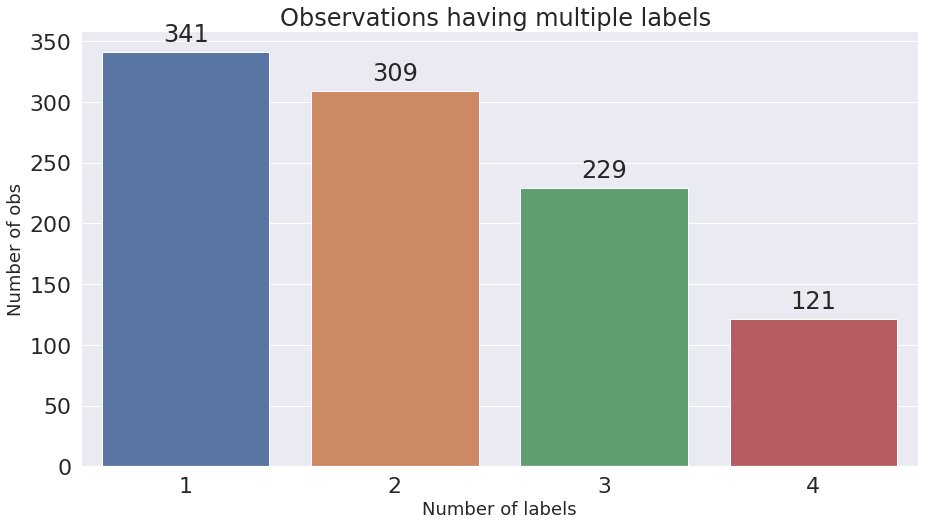

In [11]:
rowSums = np.sum(Y[:,:],axis=1)
multiLabel_counts = np.array([np.count_nonzero(rowSums==i) for i in range(1,5)])
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax = sns.barplot([i for i in range(1,5)], multiLabel_counts)
plt.title("Observations having multiple labels ")
plt.ylabel('Number of obs', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)
#adding the text labels
rects = ax.patches
labels = multiLabel_counts
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

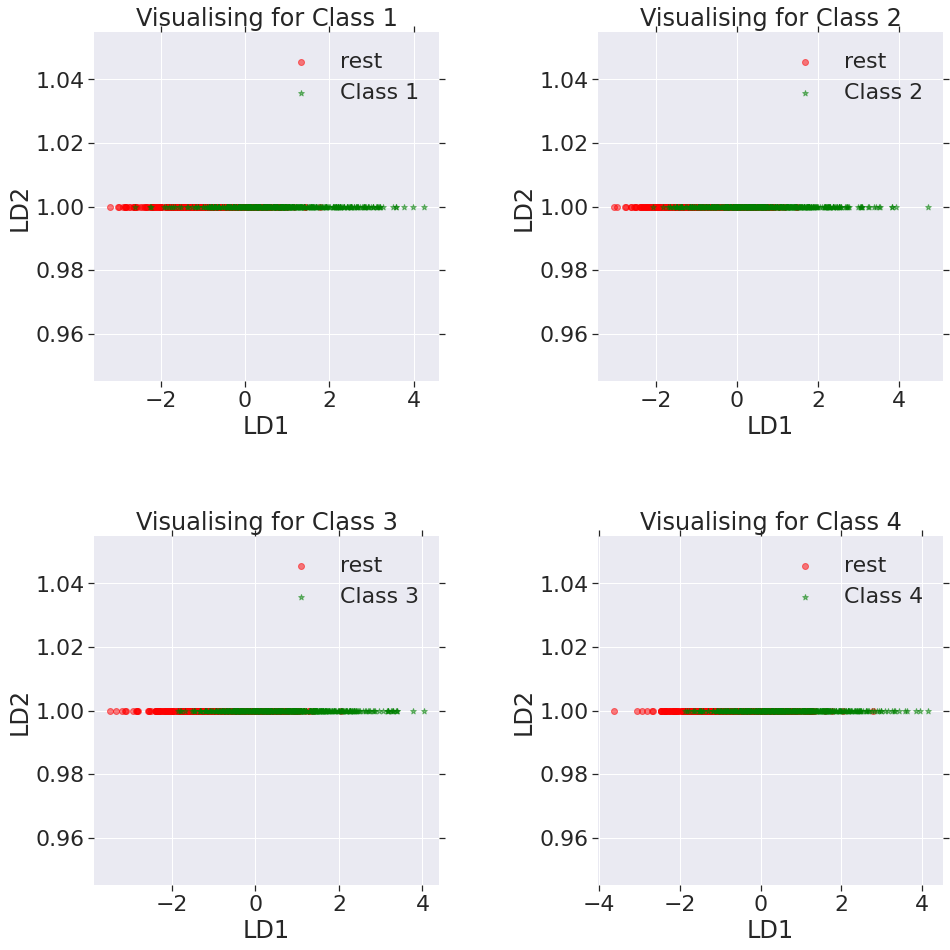

In [17]:
label_dict = {0:'Class 1', 1: 'Class 2', 2: 'Class 3', 3:'Class 4'}
plt.figure(figsize=(15,15))

def plot_scikit_lda(X, title):
    for i in range(4):
      lda=LDA()
      X_lda=lda.fit_transform(X,Y[:,i])
      #print(X_lda.shape)
      ax = plt.subplot(2,2,i+1)
      for label,marker,color in zip(
          [0,1],('o','*'),('red','green')):

          plt.scatter(x=X_lda[:,0][Y[:,i] == label],
                      y=np.ones(X_lda[Y[:,i] == label].shape[0]),#X[:,1][Y[:,i] == label],
                      marker=marker,
                      color=color,
                      alpha=0.5,
                      label=("rest",label_dict[i])[int(label==1)])

      plt.xlabel('LD1')
      plt.ylabel('LD2')

      leg = plt.legend(loc='upper right', fancybox=True)
      leg.get_frame().set_alpha(0)
      plt.title(title+label_dict[i])

      # hide axis ticks
      plt.tick_params(axis="both", which="both", bottom="off", top="off",  
              labelbottom="on", left="off", right="off", labelleft="on")

      # remove axis spines
      ax.spines["top"].set_visible(False)  
      ax.spines["right"].set_visible(False)
      ax.spines["bottom"].set_visible(False)
      ax.spines["left"].set_visible(False)    
      plt.tight_layout(pad=3.0)
    plt.show()

plot_scikit_lda(X, title='Visualising for ')

##**Logistic Regression for Multi-class Multi-label Classification**

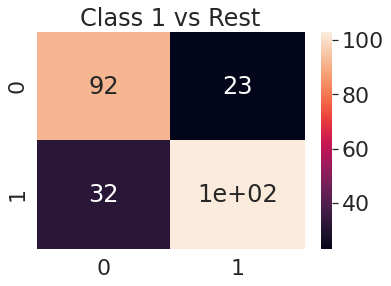

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       115
           1       0.82      0.76      0.79       135

    accuracy                           0.78       250
   macro avg       0.78      0.78      0.78       250
weighted avg       0.78      0.78      0.78       250



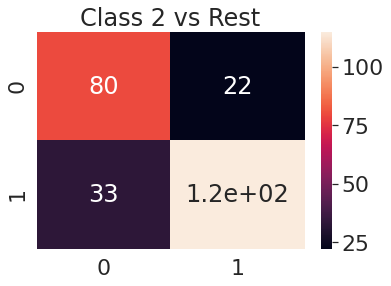

              precision    recall  f1-score   support

           0       0.71      0.78      0.74       102
           1       0.84      0.78      0.81       148

    accuracy                           0.78       250
   macro avg       0.77      0.78      0.78       250
weighted avg       0.79      0.78      0.78       250



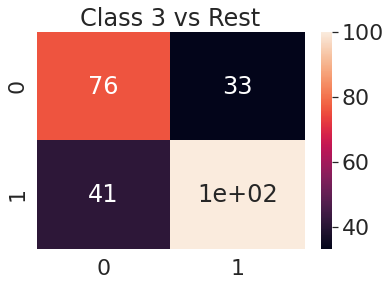

              precision    recall  f1-score   support

           0       0.65      0.70      0.67       109
           1       0.75      0.71      0.73       141

    accuracy                           0.70       250
   macro avg       0.70      0.70      0.70       250
weighted avg       0.71      0.70      0.70       250



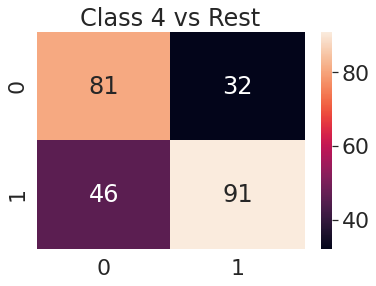

              precision    recall  f1-score   support

           0       0.64      0.72      0.67       113
           1       0.74      0.66      0.70       137

    accuracy                           0.69       250
   macro avg       0.69      0.69      0.69       250
weighted avg       0.69      0.69      0.69       250



In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0)
pred=np.ndarray(Y_test.shape)
for i in range(Y_test.shape[1]):
  lr.fit(X_train,Y_train[:,i])
  pred[:,i]=lr.predict(X_test)
  sns.heatmap(confusion_matrix(Y_test[:,i],pred[:,i]),annot=True)
  plt.title("Class "+str(i+1)+" vs Rest")
  plt.show()
  print(classification_report(Y_test[:,i],pred[:,i]))

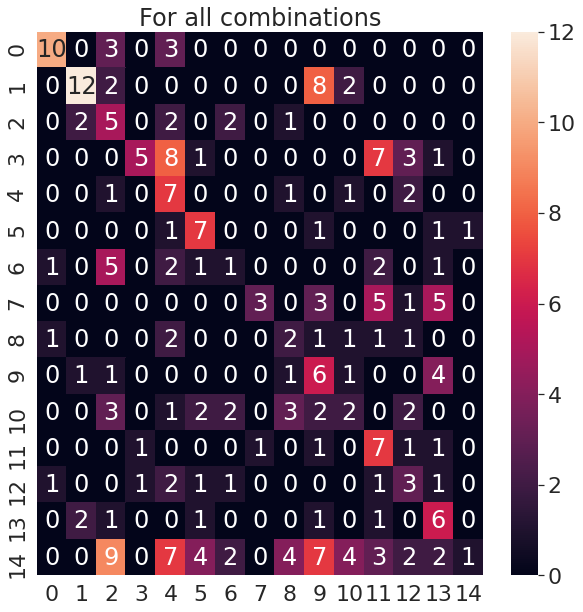

              precision    recall  f1-score   support

           1       0.77      0.62      0.69        16
           2       0.71      0.50      0.59        24
           3       0.17      0.42      0.24        12
           4       0.71      0.20      0.31        25
           5       0.20      0.58      0.30        12
           6       0.41      0.64      0.50        11
           7       0.12      0.08      0.10        13
           8       0.75      0.18      0.29        17
           9       0.17      0.22      0.19         9
          10       0.20      0.43      0.27        14
          11       0.18      0.12      0.14        17
          12       0.26      0.58      0.36        12
          13       0.20      0.27      0.23        11
          14       0.27      0.50      0.35        12
          15       0.50      0.02      0.04        45

    accuracy                           0.31       250
   macro avg       0.37      0.36      0.31       250
weighted avg       0.44   

In [33]:
y_comb=Y_test[:,0]+2*Y_test[:,1]+4*Y_test[:,2]+8*Y_test[:,3]
pred_comb=pred[:,0]+2*pred[:,1]+4*pred[:,2]+8*pred[:,3]
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_comb,pred_comb),annot=True)
plt.title("For all combinations")
plt.show()
print(classification_report(y_comb,pred_comb))